In [ ]:
!pip install -q datasets diffusers transformers accelerate torchmetrics[image]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00


# Evaluating Diffusion Models

Evaluation of generative models like [Stable Diffusion](https://huggingface.co/docs/diffusers/stable_diffusion) is subjective in nature. But as practitioners and researchers, we often have to make careful choices amongst many different possibilities. So, when working with different generative models (like GANs, Diffusion, etc.), how do we choose one over the other?

Qualitative evaluation of such models can be error-prone and might incorrectly influence a decision.
However, quantitative metrics don't necessarily correspond to image quality. So, usually, a combination
of both qualitative and quantitative evaluations provides a stronger signal when choosing one model
over the other.

In this document, we provide a non-exhaustive overview of qualitative and quantitative methods to evaluate Diffusion models. For quantitative methods, we specifically focus on how to implement them alongside `diffusers`.

The methods shown in this document can also be used to evaluate different [noise schedulers](https://huggingface.co/docs/diffusers/main/en/api/schedulers/overview) keeping the underlying generation model fixed.

## Scenarios

We cover Diffusion models with the following pipelines:

- Text-guided image generation (such as the [`StableDiffusionPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/text2img)).
- Text-guided image generation, additionally conditioned on an input image (such as the [`StableDiffusionImg2ImgPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img), and [`StableDiffusionInstructPix2PixPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/pix2pix)).
- Class-conditioned image generation models (such as the [`DiTPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/dit)).

## Qualitative

Qualitative evaluation typically involves human assessment of generated images. Quality is measured across aspects such as compositionality, image-text alignment, and spatial relations. Common prompts provide a degree of uniformity for subjective metrics. DrawBench and PartiPrompts are prompt datasets used for qualitative benchmarking. DrawBench and PartiPrompts were introduced by [Imagen](https://imagen.research.google/) and [Parti](https://parti.research.google/) respectively.

From the [official Parti website](https://parti.research.google/):

> PartiPrompts (P2) is a rich set of over 1600 prompts in English that we release as part of this work. P2 can be used to measure model capabilities across various categories and challenge aspects.

![parti-prompts](https://huggingface.co/datasets/diffusers/docs-images/resolve/main/evaluation_diffusion_models/parti-prompts.png)

PartiPrompts has the following columns:

- Prompt
- Category of the prompt (such as “Abstract”, “World Knowledge”, etc.)
- Challenge reflecting the difficulty (such as “Basic”, “Complex”, “Writing & Symbols”, etc.)

These benchmarks allow for side-by-side human evaluation of different image generation models. Let’s see how we can use `diffusers` on a couple of PartiPrompts.

Below we show some prompts sampled across different challenges: Basic, Complex, Linguistic Structures, Imagination, and Writing & Symbols. Here we are using PartiPrompts as a [dataset](https://huggingface.co/datasets/nateraw/parti-prompts).

In [ ]:
from datasets import load_dataset

# prompts = load_dataset("nateraw/parti-prompts", split="train")
# prompts = prompts.shuffle()
# sample_prompts = [prompts[i]["Prompt"] for i in range(5)]

# Fixing these sample prompts in the interest of reproducibility.
sample_prompts = [
    "a corgi",
    "a hot air balloon with a yin-yang symbol, with the moon visible in the daytime sky",
    "a car with no windows",
    "a cube made of porcupine",
    'The saying "BE EXCELLENT TO EACH OTHER" written on a red brick wall with a graffiti image of a green alien wearing a tuxedo. A yellow fire hydrant is on a sidewalk in the foreground.',
]

Now we can use these prompts to generate some images using Stable Diffusion ([v1-4 checkpoint](https://huggingface.co/CompVis/stable-diffusion-v1-4)):

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt = "CompVis/stable-diffusion-v1-4"
device = "cuda"
weight_dtype = torch.float16
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=weight_dtype).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
seed = 42
generator = torch.manual_seed(seed)

images = sd_pipeline(
    sample_prompts, num_images_per_prompt=1, generator=generator, output_type="numpy"
).images

  0%|          | 0/50 [00:00<?, ?it/s]

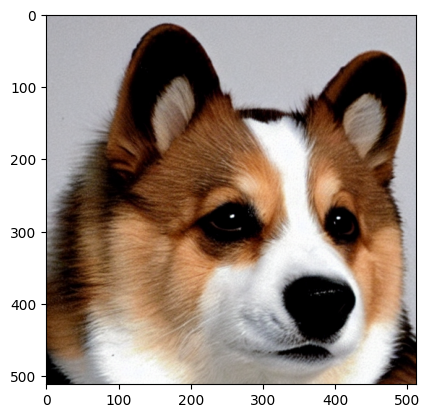

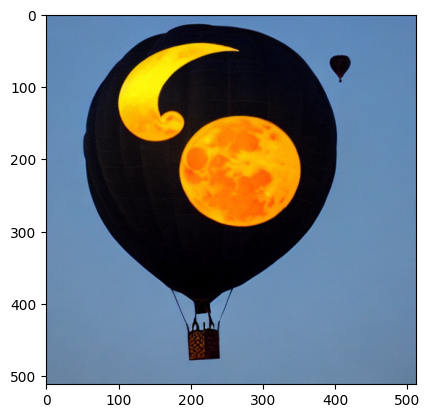

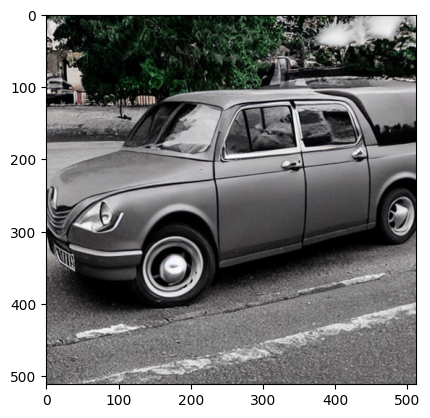

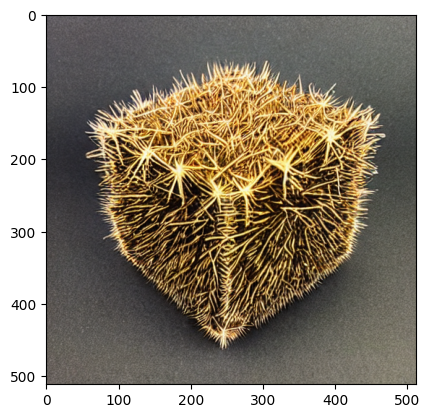

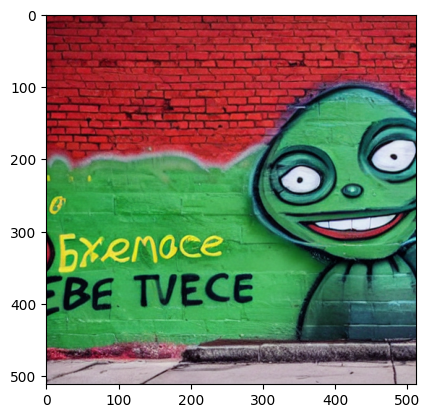

In [ ]:
# prompt: images generate 5 images that are in array formate back them into images

import matplotlib.pyplot as plt

for i, image in enumerate(images):
    plt.imshow(image)
    plt.show()


![parti-prompts-14](https://huggingface.co/datasets/diffusers/docs-images/resolve/main/evaluation_diffusion_models/parti-prompts-14.png)

We can also set `num_images_per_prompt` accordingly to compare different images for the same prompt. Running the same pipeline but with a different checkpoint ([v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)), yields:

![parti-prompts-15](https://huggingface.co/datasets/diffusers/docs-images/resolve/main/evaluation_diffusion_models/parti-prompts-15.png)

Once several images are generated from all the prompts using multiple models (under evaluation), these results are presented to human evaluators for scoring. For
more details on these benchmarks, refer to their respective papers.  

> 💡 **Tip:** It is useful to look at some inference samples while a model is training to measure the
training progress. In our [training scripts](https://github.com/huggingface/diffusers/tree/main/examples/), we support this utility with additional support for
logging to TensorBoard and Weights & Biases.

## Quantitative Evaluation

In this section, we will walk you through how to evaluate three different diffusion pipelines using:

- CLIP score
- CLIP directional similarity
- FID

### Text-guided image generation

[CLIP score](https://arxiv.org/abs/2104.08718) measures the compatibility of image-caption pairs. Higher CLIP scores imply higher compatibility 🔼. The CLIP score is a quantitative measurement of the qualitative concept "compatibility". Image-caption pair compatibility can also be thought of as the semantic similarity between the image and the caption. CLIP score was found to have high correlation with human judgement.

Generate some images with multiple prompts:

In [ ]:
prompts = [
    "a photo of an astronaut riding a horse on mars",
    "A high tech solarpunk utopia in the Amazon rainforest",
    "A pikachu fine dining with a view to the Eiffel Tower",
    "A mecha robot in a favela in expressionist style",
    "an insect robot preparing a delicious meal",
    "A small cabin on top of a snowy mountain in the style of Disney, artstation",
]

images = sd_pipeline(prompts, num_images_per_prompt=1, output_type="np").images

print(images.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(6, 512, 512, 3)


And then, we calculate the CLIP score.

In [ ]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")


def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)


sd_clip_score = calculate_clip_score(images, prompts)
print(f"CLIP score: {sd_clip_score}")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP score: 35.6976


In the above example, we generated one image per prompt. If we generated multiple images per prompt, we would have to take the average score from the generated images per prompt.

Now, if we wanted to compare two checkpoints compatible with the [`StableDiffusionPipeline`](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/overview) we should pass a generator while calling the pipeline. First, we generate images with a fixed seed with the [v1-4 Stable Diffusion checkpoint](https://huggingface.co/CompVis/stable-diffusion-v1-4):


In [ ]:
seed = 0
generator = torch.manual_seed(seed)

images = sd_pipeline(prompts, num_images_per_prompt=1, generator=generator, output_type="numpy").images

  0%|          | 0/50 [00:00<?, ?it/s]

Then we load the [v1-5 checkpoint](https://huggingface.co/runwayml/stable-diffusion-v1-5) to generate images:

In [ ]:
model_ckpt_1_5 = "runwayml/stable-diffusion-v1-5"
sd_pipeline_1_5 = StableDiffusionPipeline.from_pretrained(model_ckpt_1_5, torch_dtype=weight_dtype).to(device)

images_1_5 = sd_pipeline_1_5(
    prompts, num_images_per_prompt=1, generator=generator, output_type="numpy"
).images

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

And finally, we compare their CLIP scores:

In [ ]:
sd_clip_score_1_4 = calculate_clip_score(images, prompts)
print(f"CLIP Score with v-1-4: {sd_clip_score_1_4}")

sd_clip_score_1_5 = calculate_clip_score(images_1_5, prompts)
print(f"CLIP Score with v-1-5: {sd_clip_score_1_5}")

CLIP Score with v-1-4: 34.7688
CLIP Score with v-1-5: 36.412


It seems like the [v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5) checkpoint performs better than its predecessor. Note, however, that the number of prompts we used to compute the CLIP scores is quite low. For a more practical evaluation, this number should be way higher, and the prompts should be diverse.

> 💡 **Tip:** By construction, there are some limitations in this score. The captions in the training dataset
were crawled from the web and extracted from `alt` and similar tags associated an image on the internet.
They are not necessarily representative of what a human being would use to describe an image. Hence we
had to "engineer" some prompts here.

### Image-conditioned text-to-image generation

In this case, we condition the generation pipeline with an input image as well as a text prompt. Let's take the [`StableDiffusionInstructPix2PixPipeline`], as an example. It takes an edit instruction as an input prompt and an input image to be edited.

Here is one example:

![edit-instruction](https://huggingface.co/datasets/diffusers/docs-images/resolve/main/evaluation_diffusion_models/edit-instruction.png)

One strategy to evaluate such a model is to measure the consistency of the change between the two images (in [CLIP](https://huggingface.co/docs/transformers/model_doc/clip) space) with the change between the two image captions (as shown in [CLIP-Guided Domain Adaptation of Image Generators](https://arxiv.org/abs/2108.00946)). This is referred to as the "**CLIP directional similarity**".

- Caption 1 corresponds to the input image (image 1) that is to be edited.
- Caption 2 corresponds to the edited image (image 2). It should reflect the edit instruction.

Following is a pictorial overview:

![edit-consistency](https://huggingface.co/datasets/diffusers/docs-images/resolve/main/evaluation_diffusion_models/edit-consistency.png)

We have prepared a mini dataset to implement this metric. Let's first load the dataset.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("sayakpaul/instructpix2pix-demo", split="train")
dataset.features

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

{'input': Value(dtype='string', id=None),
 'edit': Value(dtype='string', id=None),
 'output': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

Here we have:

- `input` is a caption corresponding to the `image`.
- `edit` denotes the edit instruction.
- `output` denotes the modified caption reflecting the `edit` instruction.

Let's take a look at a sample.

In [ ]:
idx = 0
print(f"Original caption: {dataset[idx]['input']}")
print(f"Edit instruction: {dataset[idx]['edit']}")
print(f"Modified caption: {dataset[idx]['output']}")

Original caption: 2. FAROE ISLANDS: An archipelago of 18 mountainous isles in the North Atlantic Ocean between Norway and Iceland, the Faroe Islands has 'everything you could hope for', according to Big 7 Travel. It boasts 'crystal clear waterfalls, rocky cliffs that seem to jut out of nowhere and velvety green hills'
Edit instruction: make the isles all white marble
Modified caption: 2. WHITE MARBLE ISLANDS: An archipelago of 18 mountainous white marble isles in the North Atlantic Ocean between Norway and Iceland, the White Marble Islands has 'everything you could hope for', according to Big 7 Travel. It boasts 'crystal clear waterfalls, rocky cliffs that seem to jut out of nowhere and velvety green hills'


And here is the image:

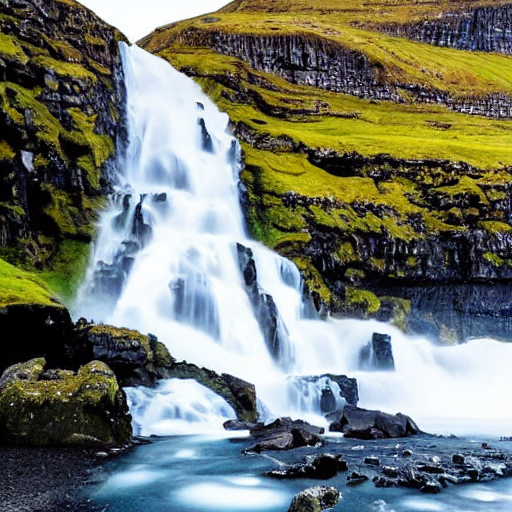

In [ ]:
dataset[idx]["image"]

We will first edit the images of our dataset with the edit instruction and compute the directional similarity.

Let's first load the [`StableDiffusionInstructPix2PixPipeline`](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/pix2pix):

In [ ]:
from diffusers import StableDiffusionInstructPix2PixPipeline

instruct_pix2pix_pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix", torch_dtype=torch.float16
).to(device)

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Now, we perform the edits:

In [ ]:
import numpy as np


def edit_image(input_image, instruction):
    image = instruct_pix2pix_pipeline(
        instruction,
        image=input_image,
        output_type="numpy",
        generator=generator,
    ).images[0]
    return image


input_images = []
original_captions = []
modified_captions = []
edited_images = []

for idx in range(len(dataset)):
    input_image = dataset[idx]["image"]
    edit_instruction = dataset[idx]["edit"]
    edited_image = edit_image(input_image, edit_instruction)

    input_images.append(np.array(input_image))
    original_captions.append(dataset[idx]["input"])
    modified_captions.append(dataset[idx]["output"])
    edited_images.append(edited_image)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

To measure the directional similarity, we first load CLIP's image and text encoders.

In [ ]:
from transformers import (
    CLIPTokenizer,
    CLIPTextModelWithProjection,
    CLIPVisionModelWithProjection,
    CLIPImageProcessor,
)

clip_id = "openai/clip-vit-large-patch14"
tokenizer = CLIPTokenizer.from_pretrained(clip_id)
text_encoder = CLIPTextModelWithProjection.from_pretrained(clip_id).to(device)
image_processor = CLIPImageProcessor.from_pretrained(clip_id)
image_encoder = CLIPVisionModelWithProjection.from_pretrained(clip_id).to(device)

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Notice that we are using a particular CLIP checkpoint, i.e., `openai/clip-vit-large-patch14`. This is because the Stable Diffusion pre-training was performed with this CLIP variant. For more details, refer to the [documentation](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/pix2pix#diffusers.StableDiffusionInstructPix2PixPipeline.text_encoder).

Next, we prepare a PyTorch `nn.module` to compute directional similarity:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class DirectionalSimilarity(nn.Module):
    def __init__(self, tokenizer, text_encoder, image_processor, image_encoder):
        super().__init__()
        self.tokenizer = tokenizer
        self.text_encoder = text_encoder
        self.image_processor = image_processor
        self.image_encoder = image_encoder

    def preprocess_image(self, image):
        image = self.image_processor(image, return_tensors="pt")["pixel_values"]
        return {"pixel_values": image.to(device)}

    def tokenize_text(self, text):
        inputs = self.tokenizer(
            text,
            max_length=self.tokenizer.model_max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {"input_ids": inputs.input_ids.to(device)}

    def encode_image(self, image):
        preprocessed_image = self.preprocess_image(image)
        image_features = self.image_encoder(**preprocessed_image).image_embeds
        image_features = image_features / image_features.norm(dim=1, keepdim=True)
        return image_features

    def encode_text(self, text):
        tokenized_text = self.tokenize_text(text)
        text_features = self.text_encoder(**tokenized_text).text_embeds
        text_features = text_features / text_features.norm(dim=1, keepdim=True)
        return text_features

    def compute_directional_similarity(self, img_feat_one, img_feat_two, text_feat_one, text_feat_two):
        sim_direction = F.cosine_similarity(img_feat_two - img_feat_one, text_feat_two - text_feat_one)
        return sim_direction

    def forward(self, image_one, image_two, caption_one, caption_two):
        img_feat_one = self.encode_image(image_one)
        img_feat_two = self.encode_image(image_two)
        text_feat_one = self.encode_text(caption_one)
        text_feat_two = self.encode_text(caption_two)
        directional_similarity = self.compute_directional_similarity(
            img_feat_one, img_feat_two, text_feat_one, text_feat_two
        )
        return directional_similarity

Let's put `DirectionalSimilarity` to use now.

In [ ]:
dir_similarity = DirectionalSimilarity(tokenizer, text_encoder, image_processor, image_encoder)
scores = []

for i in range(len(input_images)):
    original_image = input_images[i]
    original_caption = original_captions[i]
    edited_image = edited_images[i]
    modified_caption = modified_captions[i]

    similarity_score = dir_similarity(original_image, edited_image, original_caption, modified_caption)
    scores.append(float(similarity_score.detach().cpu()))

print(f"CLIP directional similarity: {np.mean(scores)}")

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


CLIP directional similarity: 0.06923750266432763


Like the CLIP Score, the higher the CLIP directional similarity, the better it is.

It should be noted that the `StableDiffusionInstructPix2PixPipeline` exposes two arguments, namely, `image_guidance_scale` and `guidance_scale` that let you control the quality of the final edited image. We encourage you to experiment with these two arguments and see the impact of that on the directional similarity.

We can extend the idea of this metric to measure how similar the original image and edited version are. To do that, we can just do `F.cosine_similarity(img_feat_two, img_feat_one)`. For these kinds of edits, we would still want the primary semantics of the images to be preserved as much as possible, i.e., a high similarity score.

We can use these metrics for similar pipelines such as the[`StableDiffusionPix2PixZeroPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/pix2pix_zero#diffusers.StableDiffusionPix2PixZeroPipeline)`.

> **Info**: Both CLIP score and CLIP direction similarity rely on the CLIP model, which can make the evaluations biased.

***Extending metrics like IS, FID (discussed later), or KID can be difficult*** when the model under evaluation was pre-trained on a large image-captioning dataset (such as the [LAION-5B dataset](https://laion.ai/blog/laion-5b/)). This is because underlying these metrics is an InceptionNet (pre-trained on the ImageNet-1k dataset) used for extracting intermediate image features. The pre-training dataset of Stable Diffusion may have limited overlap with the pre-training dataset of InceptionNet, so it is not a good candidate here for feature extraction.

***Using the above metrics helps evaluate models that are class-conditioned. For example, [DiT](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/overview). It was pre-trained being conditioned on the ImageNet-1k classes.***


### Class-conditioned image generation

Class-conditioned generative models are usually pre-trained on a class-labeled dataset such as [ImageNet-1k](https://huggingface.co/datasets/imagenet-1k). Popular metrics for evaluating these models include Fréchet Inception Distance (FID), Kernel Inception Distance (KID), and Inception Score (IS). In this document, we focus on FID ([Heusel et al.](https://arxiv.org/abs/1706.08500)). We show how to compute it with the [`DiTPipeline`](https://huggingface.co/docs/diffusers/api/pipelines/dit), which uses the [DiT model](https://arxiv.org/abs/2212.09748) under the hood.

FID aims to measure how similar are two datasets of images. As per [this resource](https://mmgeneration.readthedocs.io/en/latest/quick_run.html#fid):

> Fréchet Inception Distance is a measure of similarity between two datasets of images. It was shown to correlate well with the human judgment of visual quality and is most often used to evaluate the quality of samples of Generative Adversarial Networks. FID is calculated by computing the Fréchet distance between two Gaussians fitted to feature representations of the Inception network.

These two datasets are essentially the dataset of real images and the dataset of fake images (generated images in our case). FID is usually calculated with two large datasets. However, for this document, we will work with two mini datasets.

Let's first download a few images from the ImageNet-1k training set:

In [ ]:
from zipfile import ZipFile
import requests


def download(url, local_filepath):
    r = requests.get(url)
    with open(local_filepath, "wb") as f:
        f.write(r.content)
    return local_filepath


dummy_dataset_url = "https://hf.co/datasets/sayakpaul/sample-datasets/resolve/main/sample-imagenet-images.zip"
local_filepath = download(dummy_dataset_url, dummy_dataset_url.split("/")[-1])

with ZipFile(local_filepath, "r") as zipper:
    zipper.extractall(".")

In [ ]:
from PIL import Image
import os

dataset_path = "sample-imagenet-images"
image_paths = sorted([os.path.join(dataset_path, x) for x in os.listdir(dataset_path)])

real_images = [np.array(Image.open(path).convert("RGB")) for path in image_paths]

These are 10 images from the following Imagenet-1k classes: "cassette_player", "chain_saw" (x2), "church", "gas_pump" (x3), "parachute" (x2), and "tench".

Now that the images are loaded, let's apply some lightweight pre-processing on them to use them for FID calculation.

In [ ]:
from torchvision.transforms import functional as F


def preprocess_image(image):
    image = torch.tensor(image).unsqueeze(0)
    image = image.permute(0, 3, 1, 2) / 255.0
    return F.center_crop(image, (256, 256))


real_images = torch.cat([preprocess_image(image) for image in real_images])
print(real_images.shape)

torch.Size([10, 3, 256, 256])


We now load the [`DiTPipeline`](https://huggingface.co/docs/diffusers/api/pipelines/dit) to generate images conditioned on the above-mentioned classes.


In [ ]:
from diffusers import DiTPipeline, DPMSolverMultistepScheduler

dit_pipeline = DiTPipeline.from_pretrained("facebook/DiT-XL-2-256", torch_dtype=torch.float16)
dit_pipeline.scheduler = DPMSolverMultistepScheduler.from_config(dit_pipeline.scheduler.config)
dit_pipeline = dit_pipeline.to("cuda")

model_index.json:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.00G [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
words = [
    "cassette player",
    "chainsaw",
    "chainsaw",
    "church",
    "gas pump",
    "gas pump",
    "gas pump",
    "parachute",
    "parachute",
    "tench",
]

class_ids = dit_pipeline.get_label_ids(words)
output = dit_pipeline(class_labels=class_ids, generator=generator, output_type="numpy")

fake_images = output.images
fake_images = torch.tensor(fake_images)
fake_images = fake_images.permute(0, 3, 1, 2)
print(fake_images.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([10, 3, 256, 256])


Now, we can compute the FID using [`torchmetrics`](https://torchmetrics.readthedocs.io/).

In [ ]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(normalize=True)
fid.update(real_images, real=True)
fid.update(fake_images, real=False)

print(f"FID: {float(fid.compute())}")

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:05<00:00, 16.9MB/s]


FID: 140.0084686279297


The lower the FID, the better it is. Several things can influence FID here:

- Number of images (both real and fake)
- Randomness induced in the diffusion process
- Number of inference steps in the diffusion process
- The scheduler being used in the diffusion process

For the last two points, it is, therefore, a good practice to run the evaluation across different seeds and inference steps, and then report an average result.

FID results tend to be fragile as they depend on a lot of factors:

* The specific Inception model used during computation.
* The implementation accuracy of the computation.
* The image format (not the same if we start from PNGs vs JPGs).

Keeping that in mind, FID is often most useful when comparing similar runs, but it is
hard to to reproduce paper results unless the authors carefully disclose the FID
measurement code.

These points apply to other related metrics too, such as KID and IS.

As a final step, let's visually inspect the `fake_images` and `real_images`, respectively.

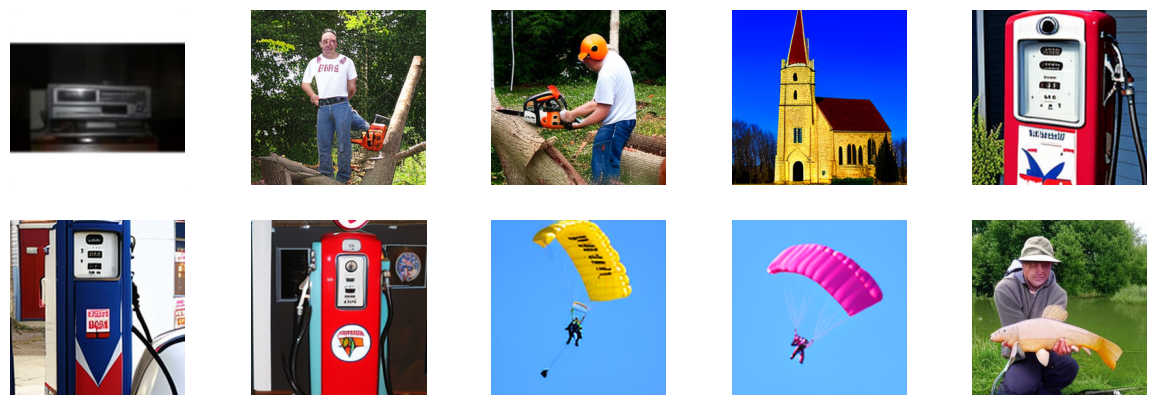

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i in range(len(fake_images)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(fake_images[i].numpy().transpose(1, 2, 0))
    plt.axis("off")

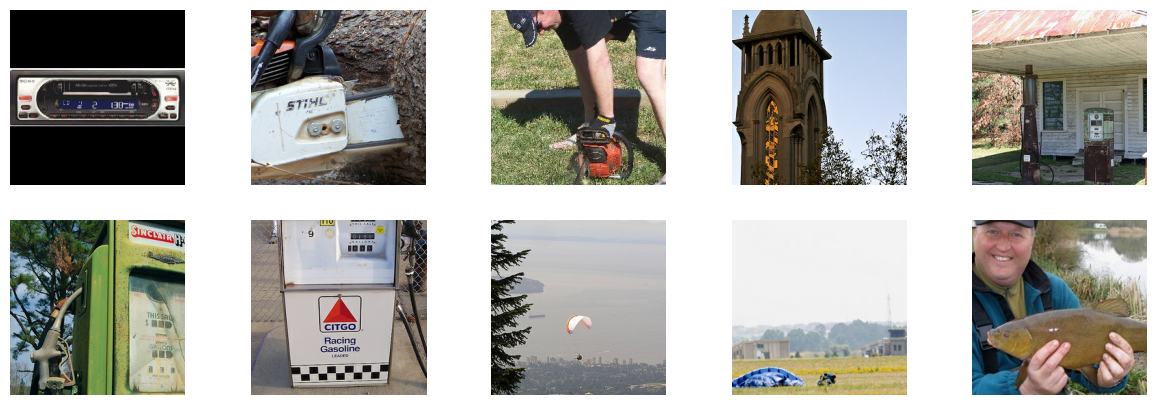

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(len(real_images)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(real_images[i].numpy().transpose(1, 2, 0))
    plt.axis("off")